The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['C2', 'C12', 'G3'] trials were dropped from the ecoli measurements.
The ['B2', 'B12', 'D2', 'D12', 'E2', 'E12', 'F2', 'F12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C12', 'G3'] trials were dropped from the OD measurements.
2022-07-08 10:37:33.051660
Done with biomass loop: 0.6466145833333333 min
Done with metabolites loop: 12.341927083333333 min
Done with the dbc & diffc loop: 0.8221354166666667 min
Done with loading the variables, constraints, and objective: 3.9033854166666666 min
Done exporting the content: 0.6244791666666667 min
2022-07-08 10:55:55.940817


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\RK2_midpoint\mscommfitting.py:435: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = pyplot.subplots()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'B5_ecoli_malt_EX_cpd00007_e0.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'B5_ecoli_malt_EX_cpd00009_e0.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'B5_ecoli_malt_EX_cpd00011_e0.jpg'

FeasibilityError: The solution is sub-optimal, with a infeasible status.

growth: 100 objective value: 30822.64231802984 






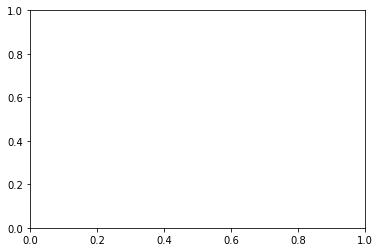

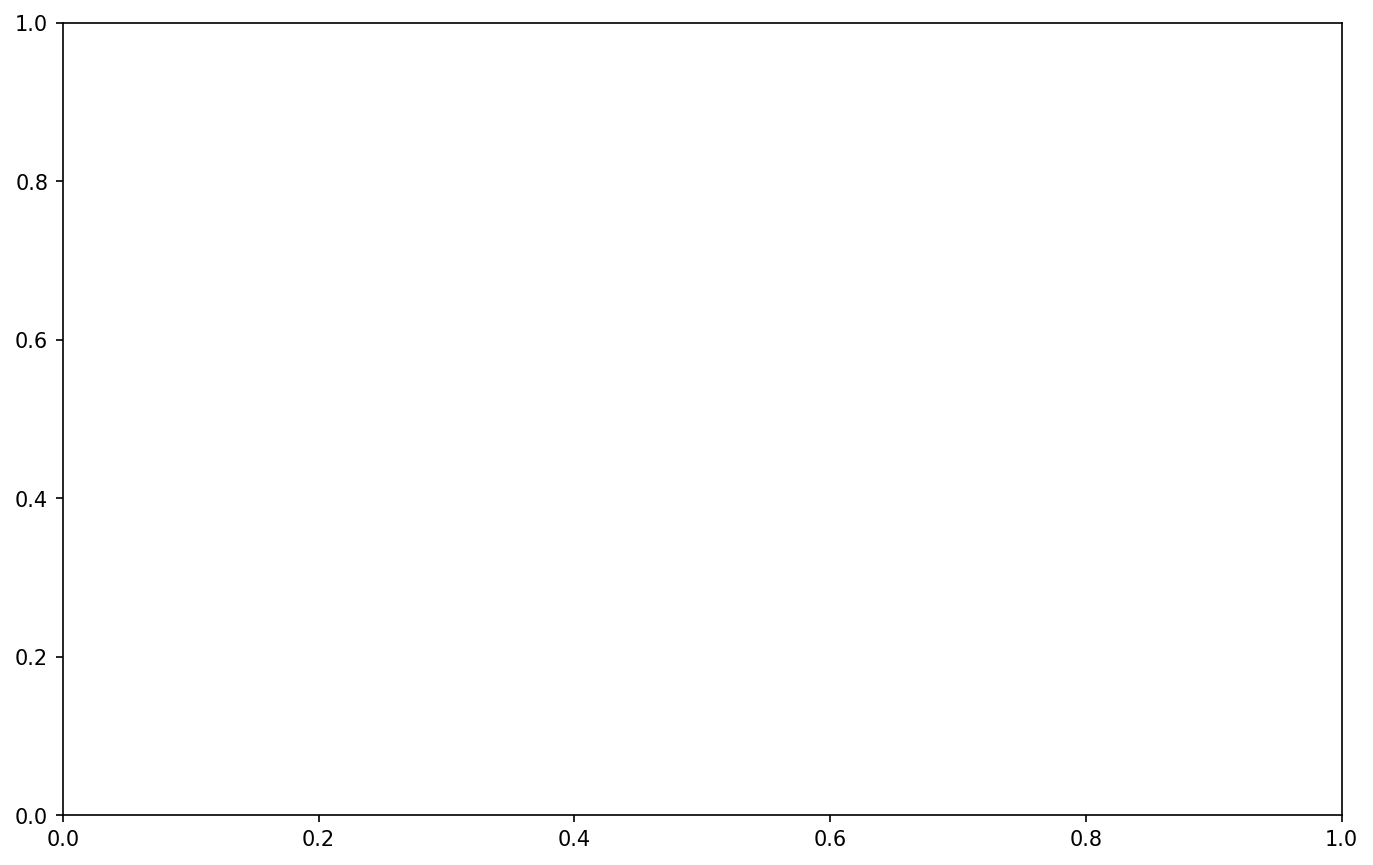

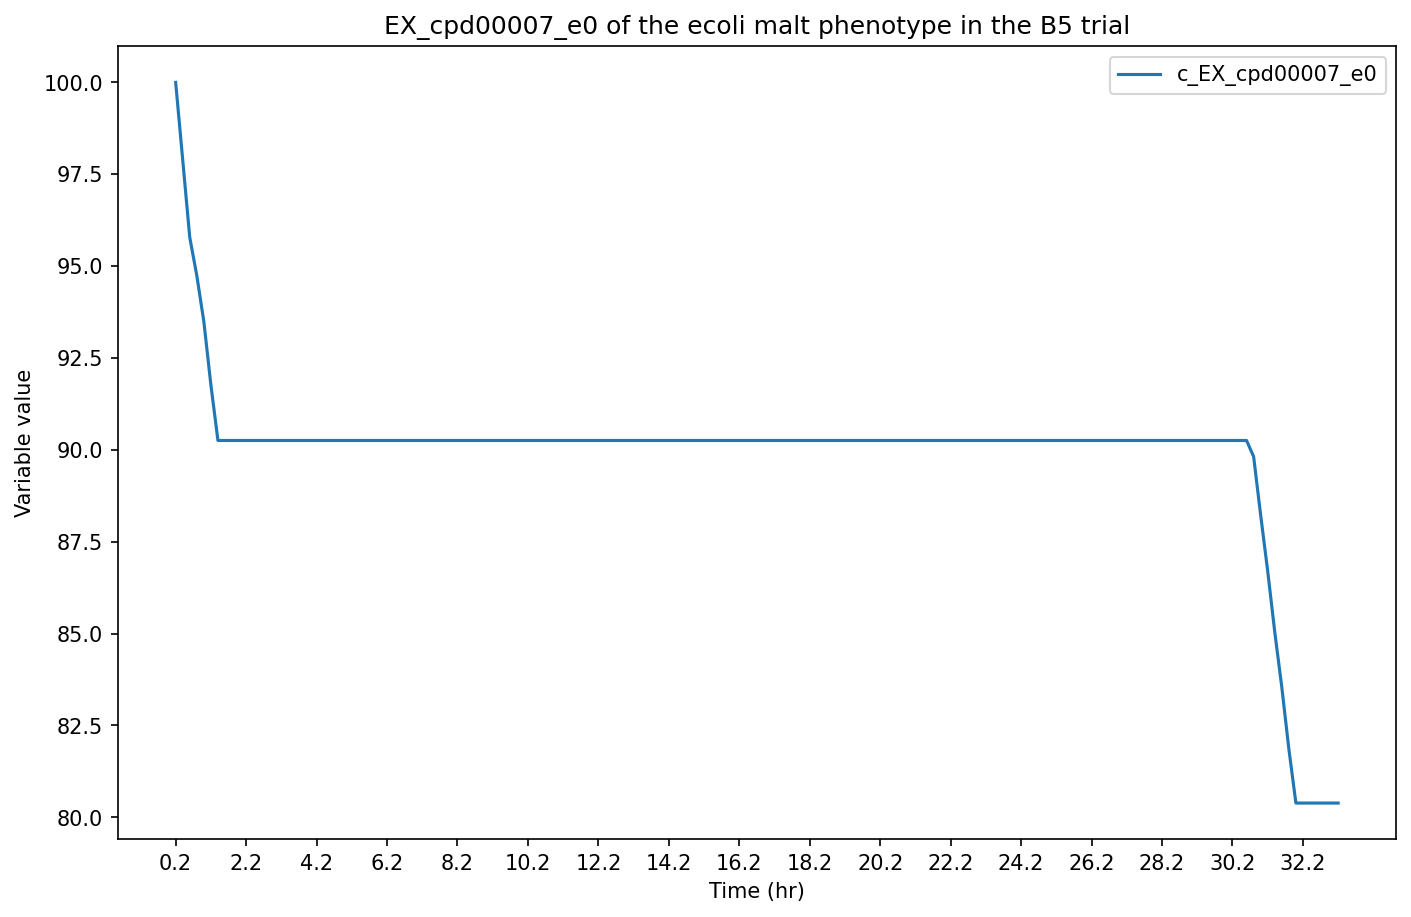

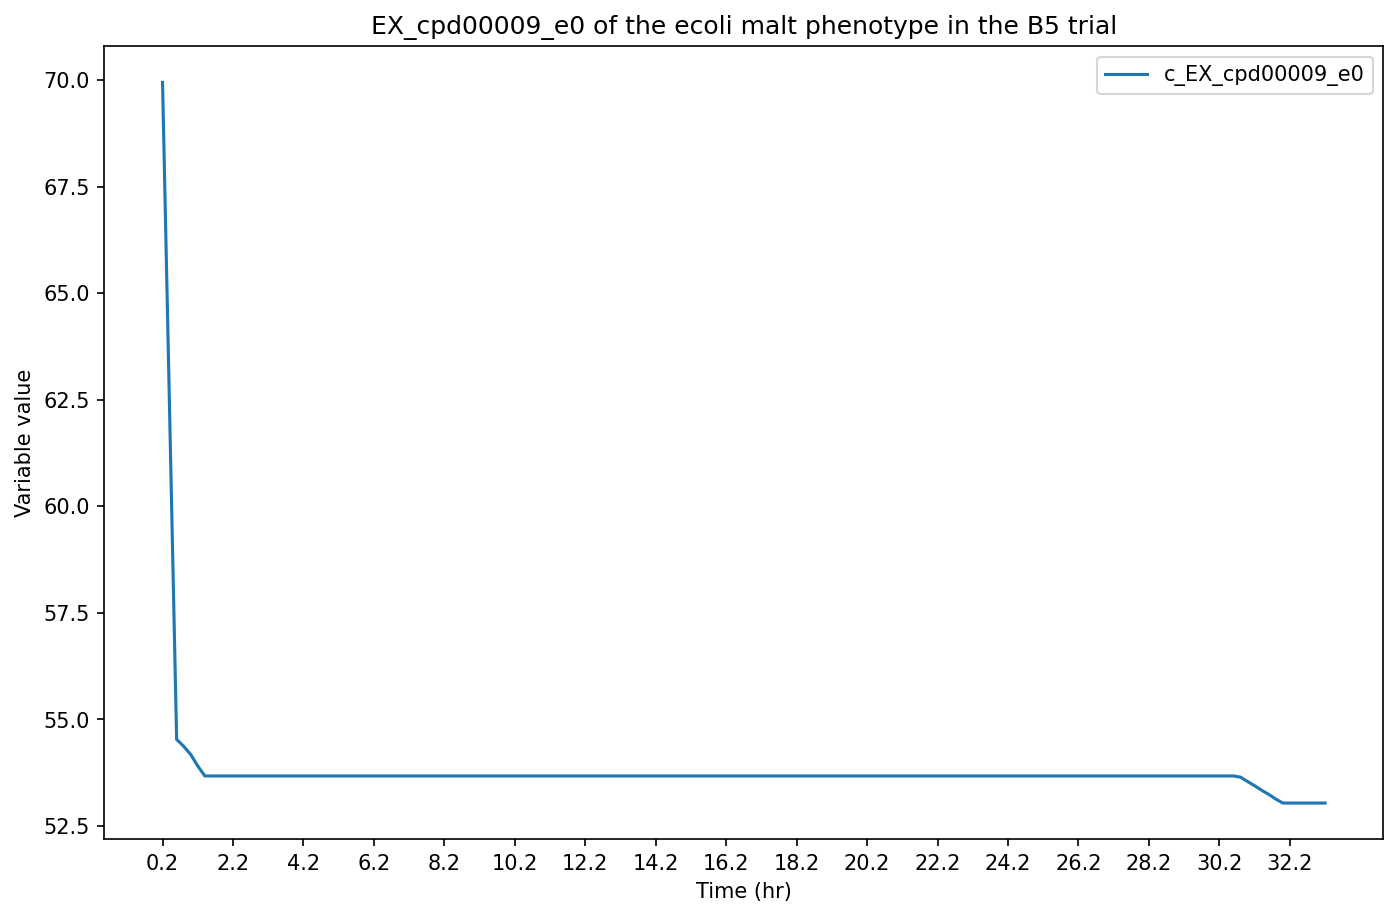

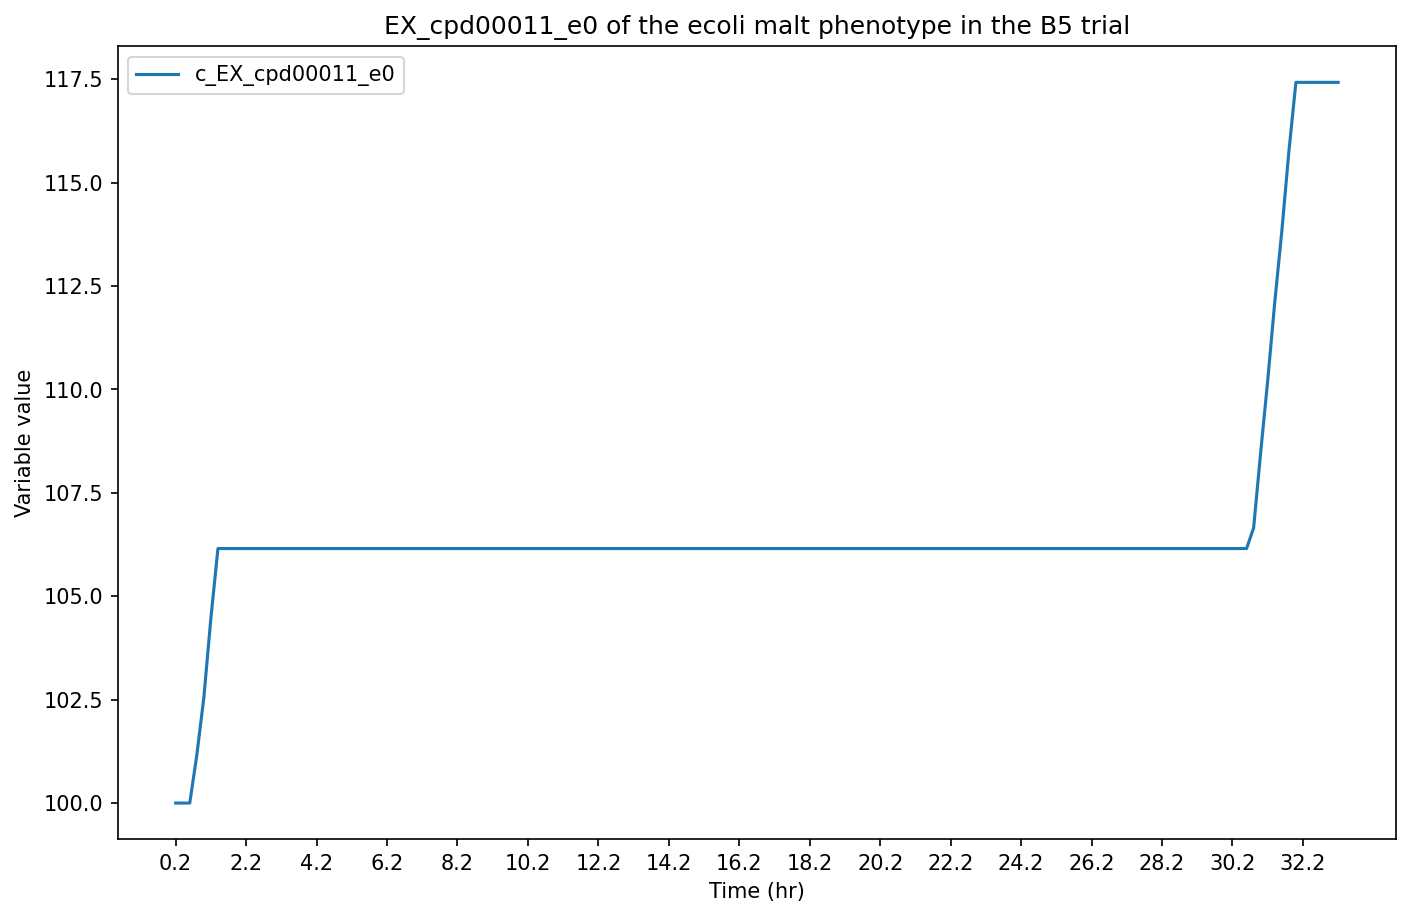

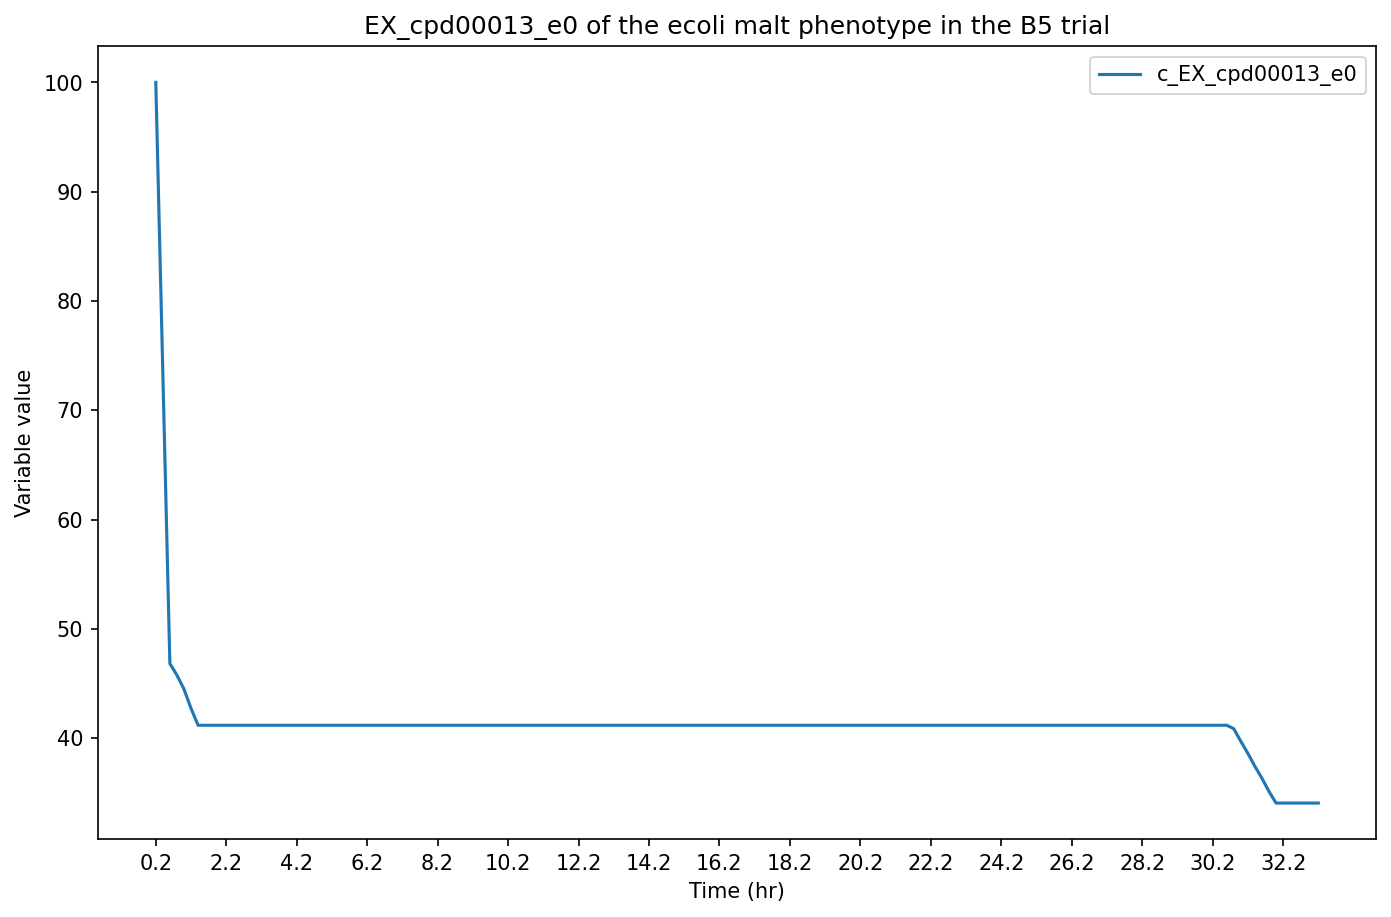

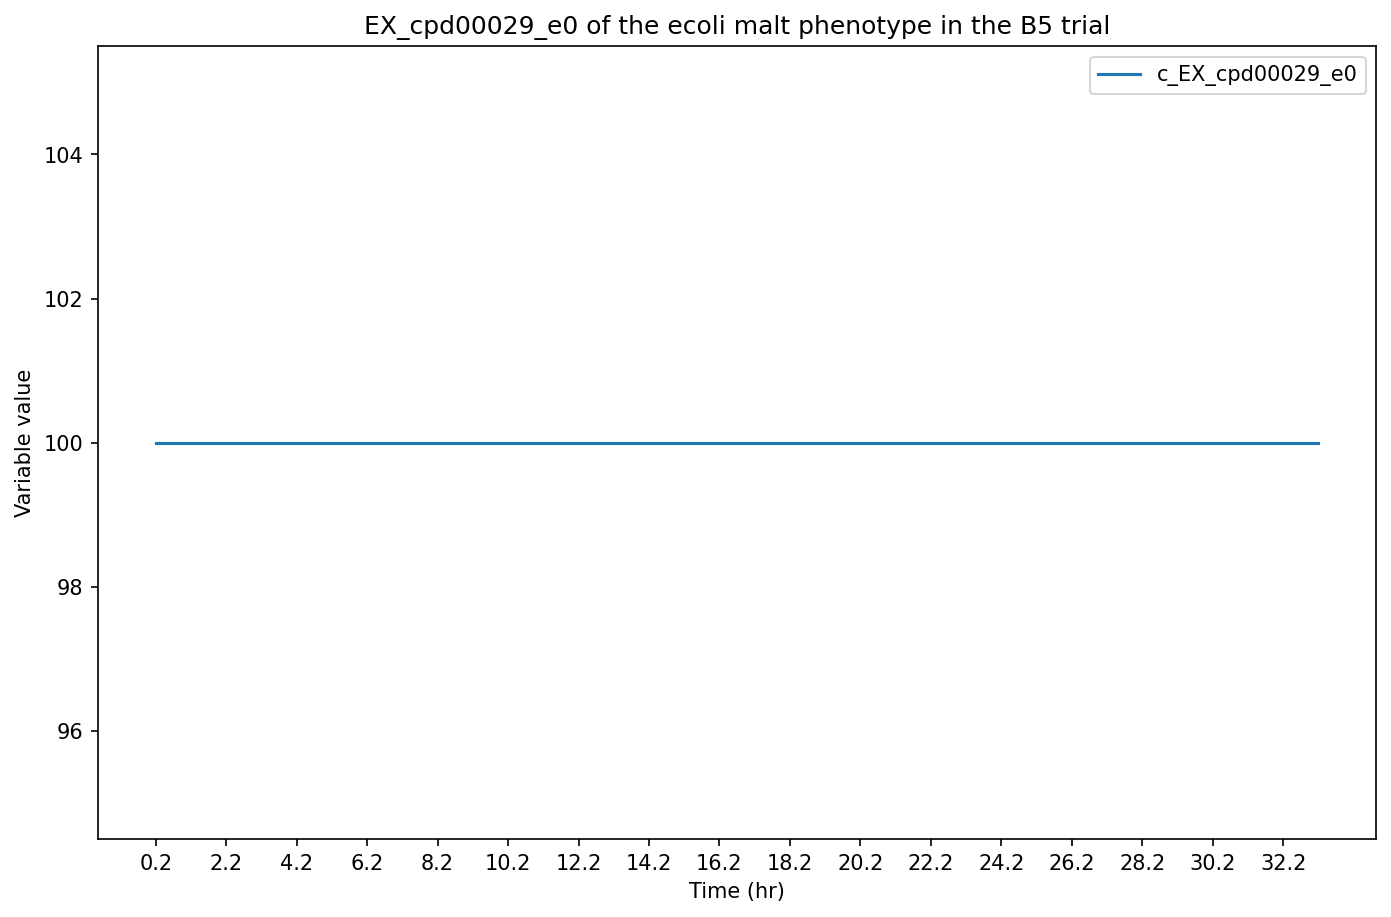

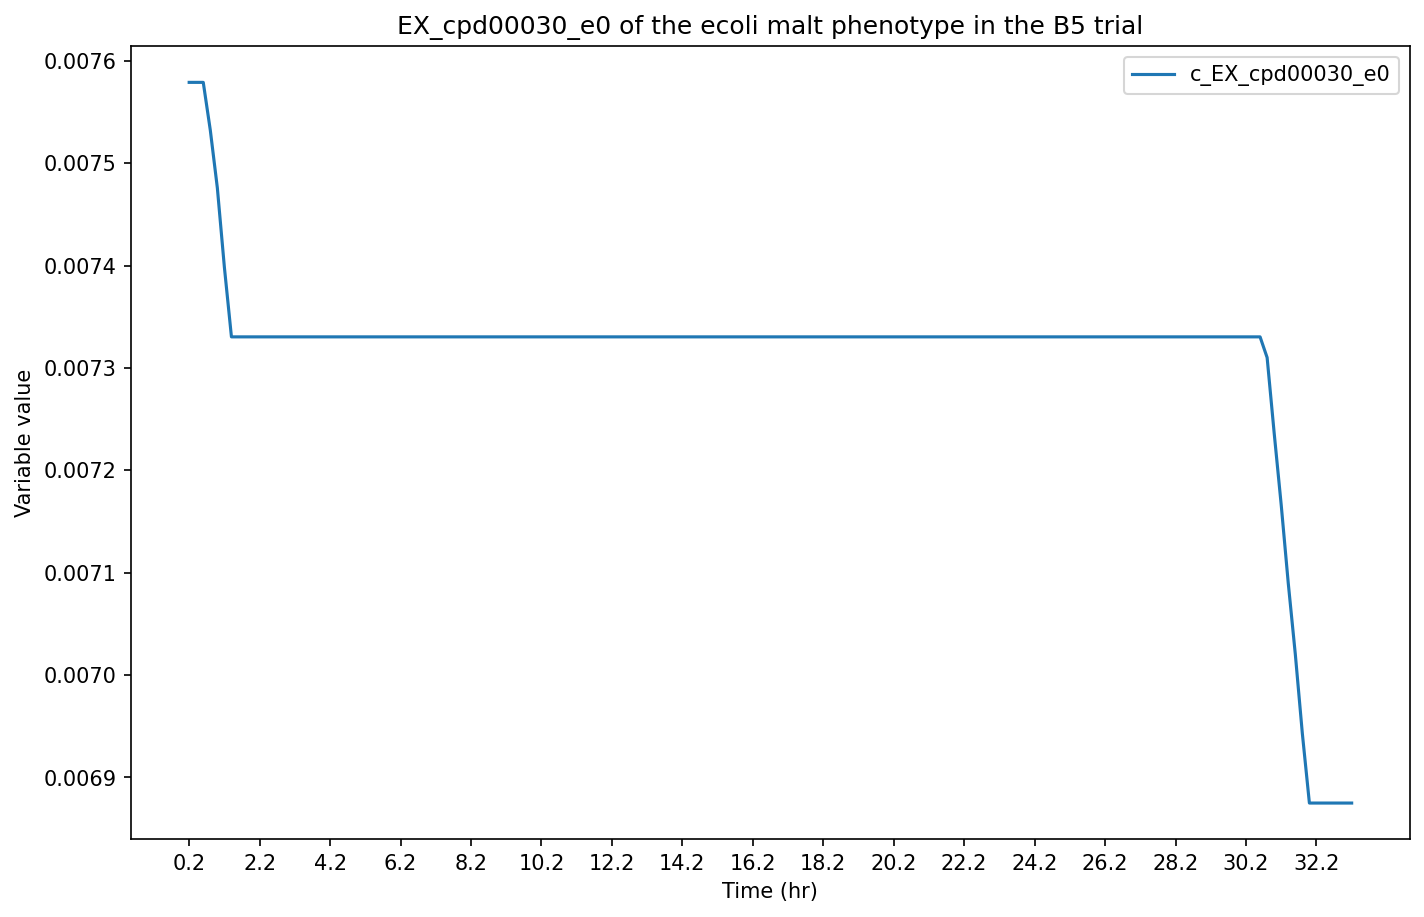

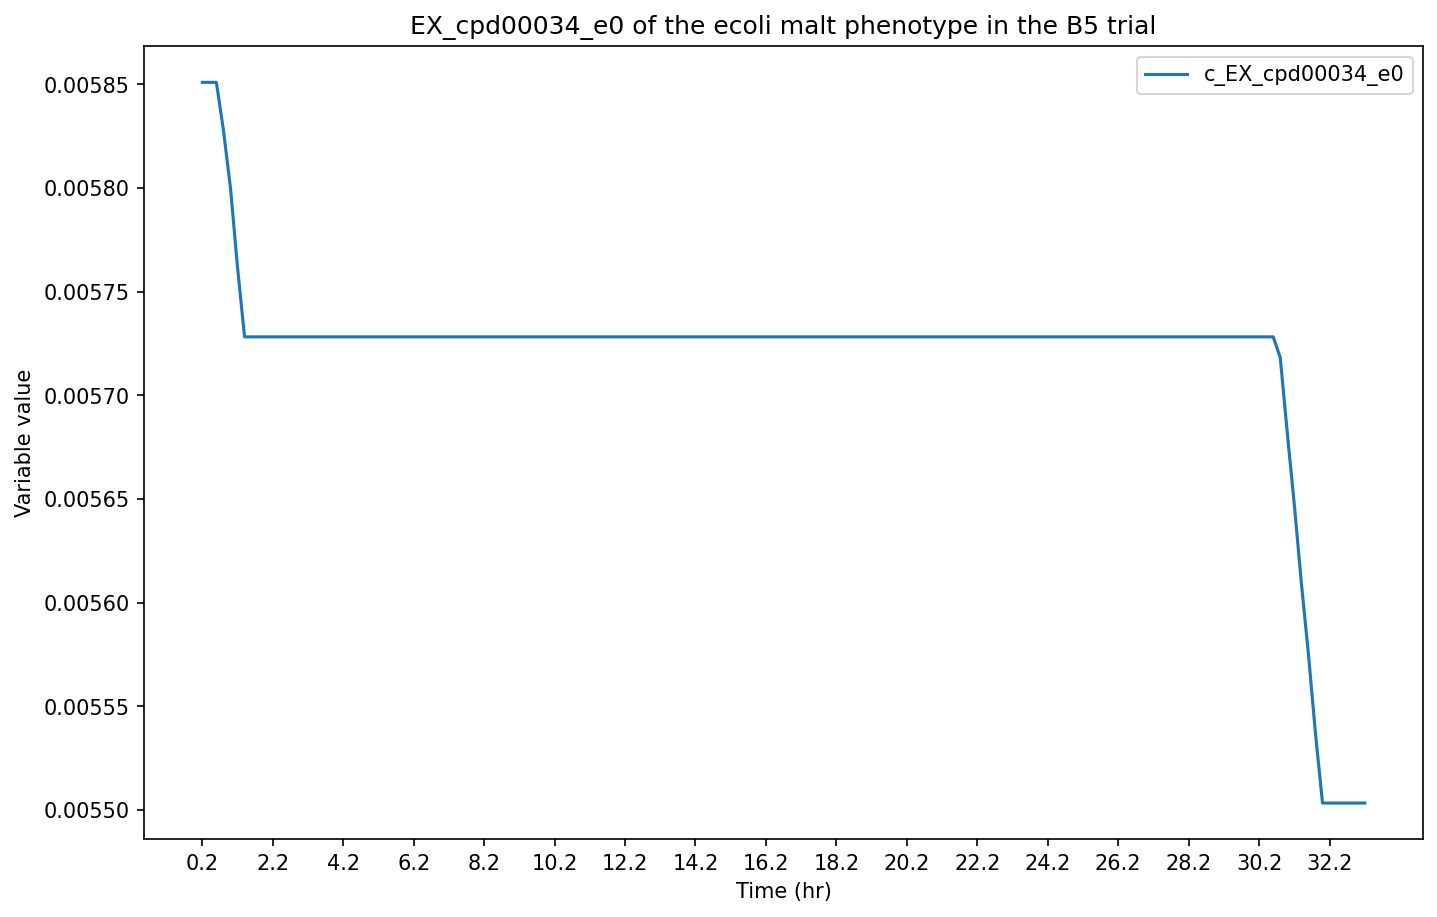

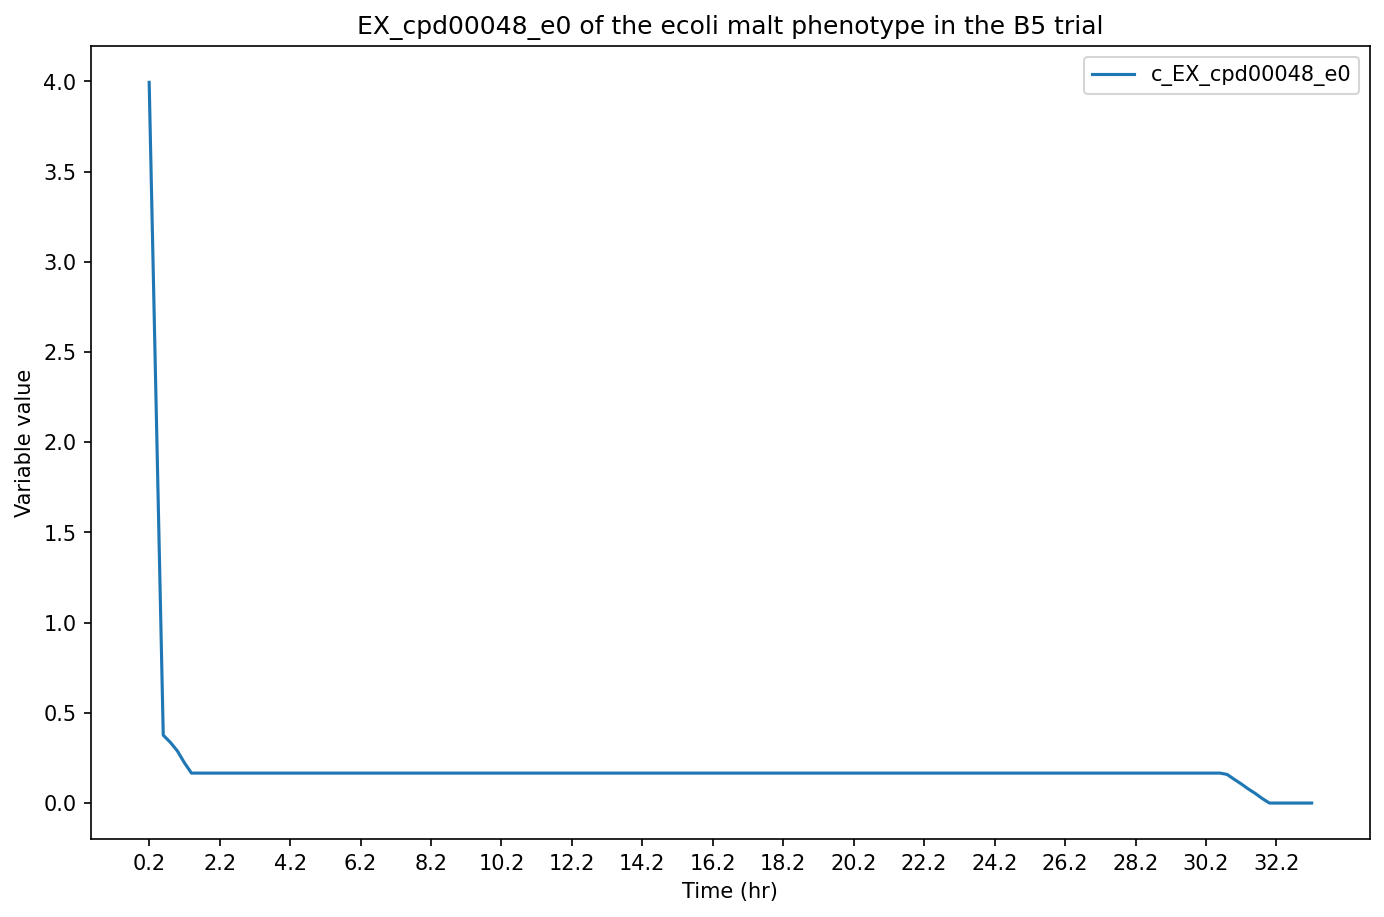

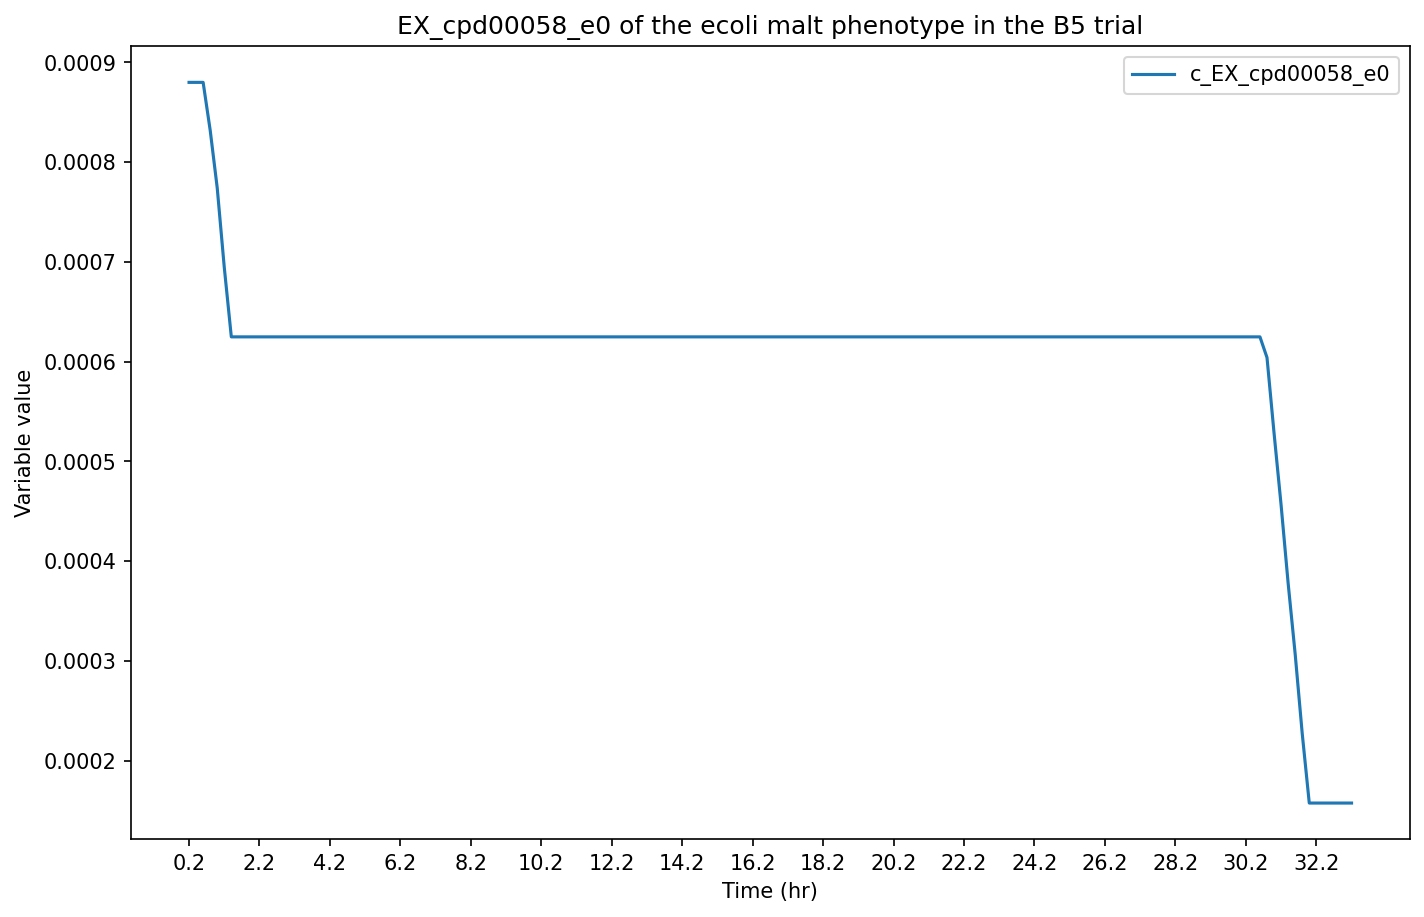

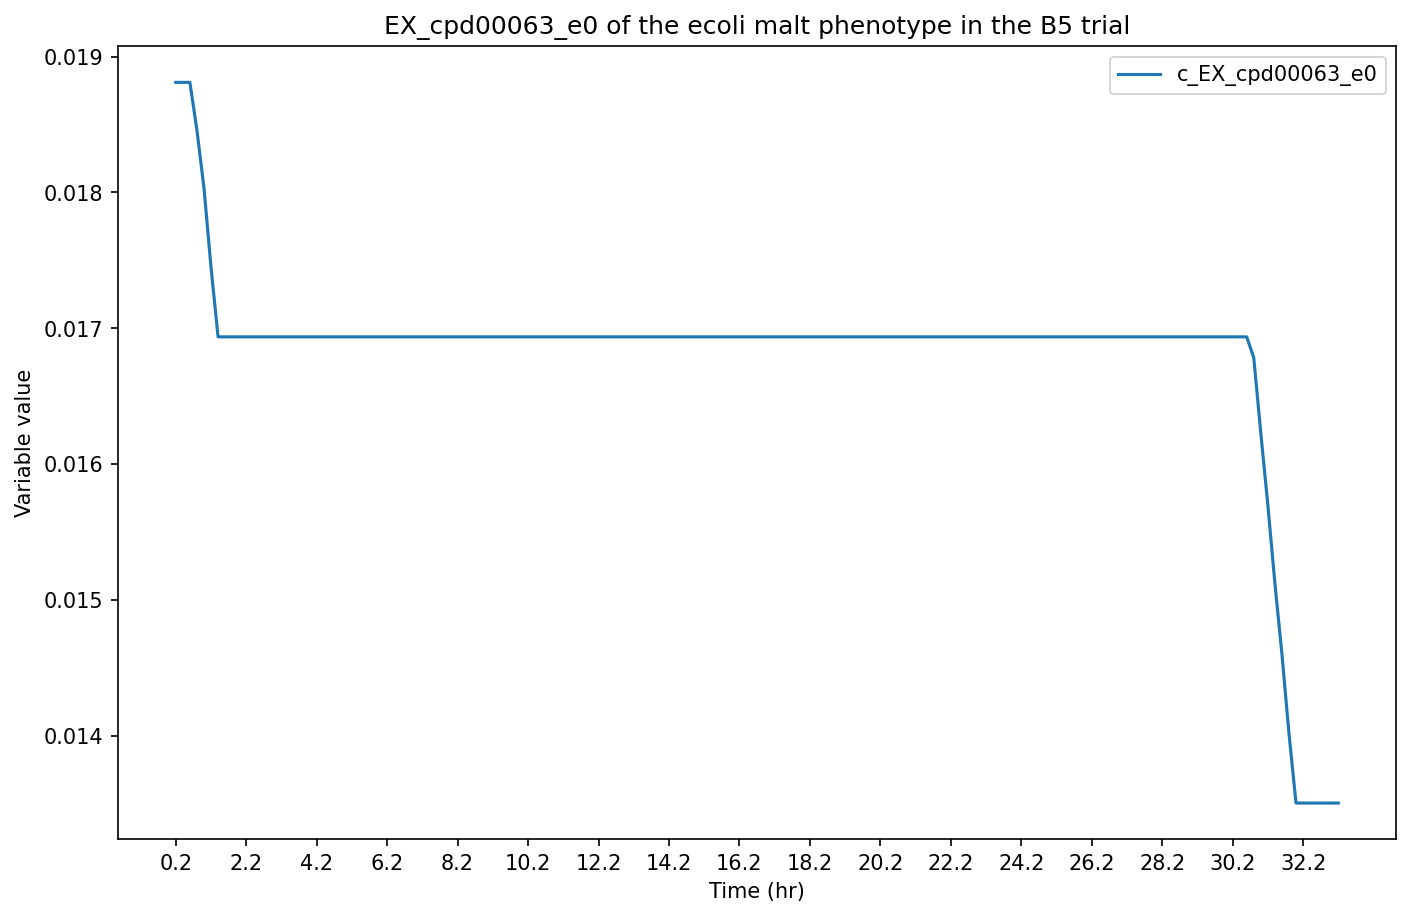

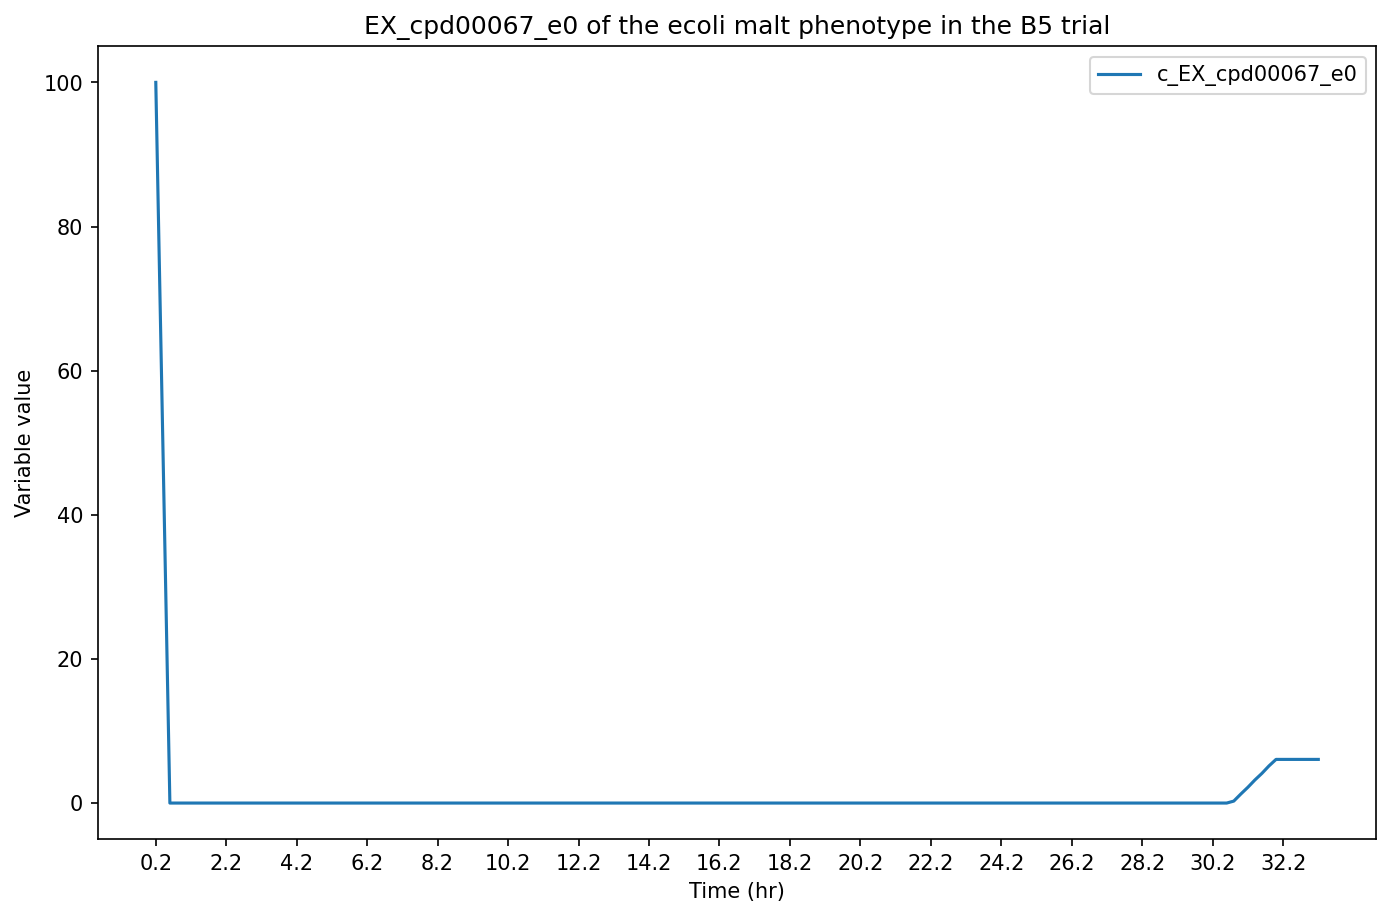

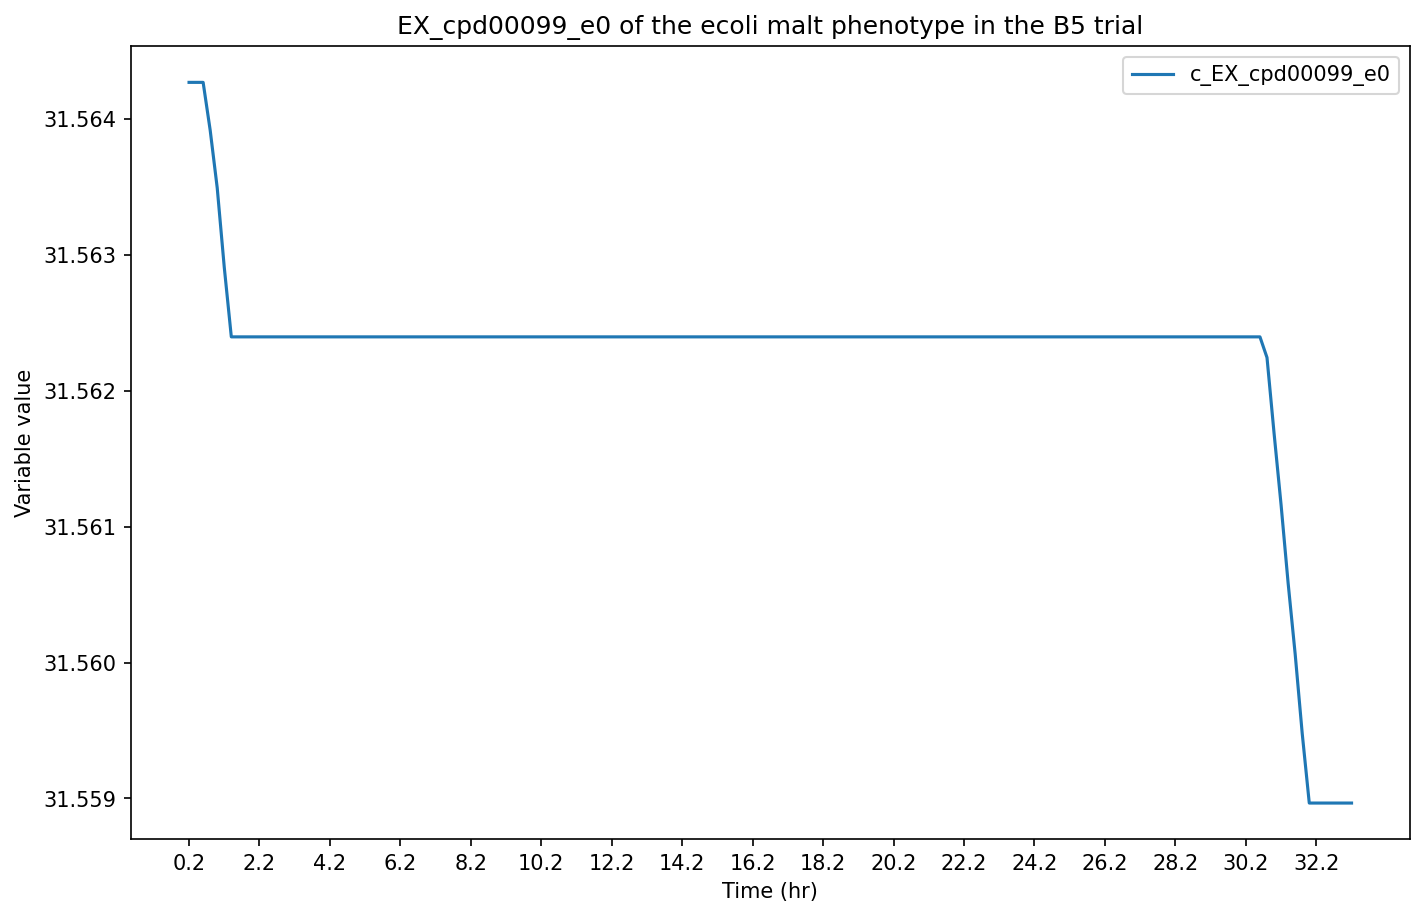

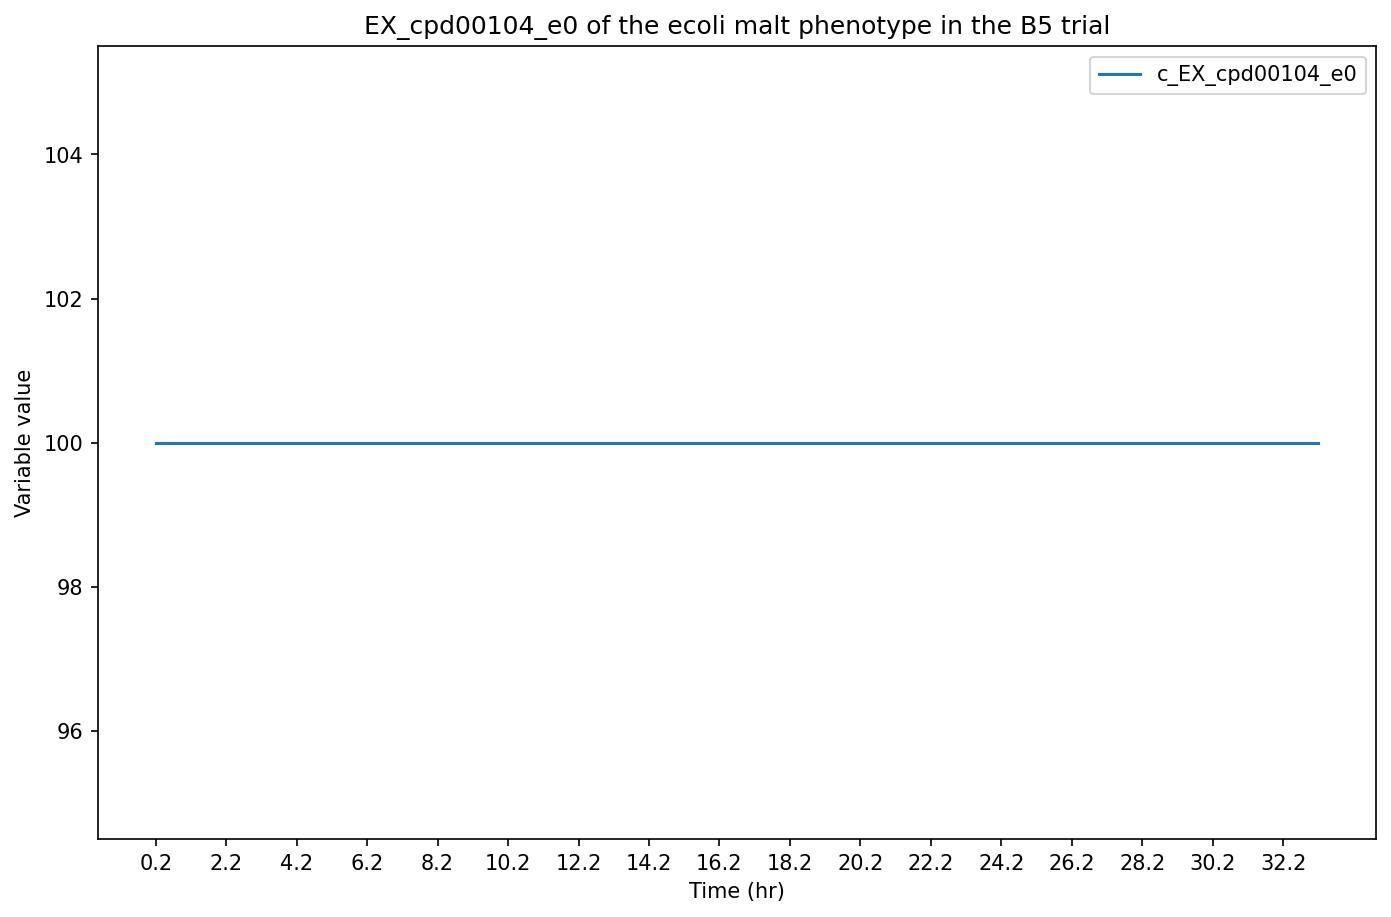

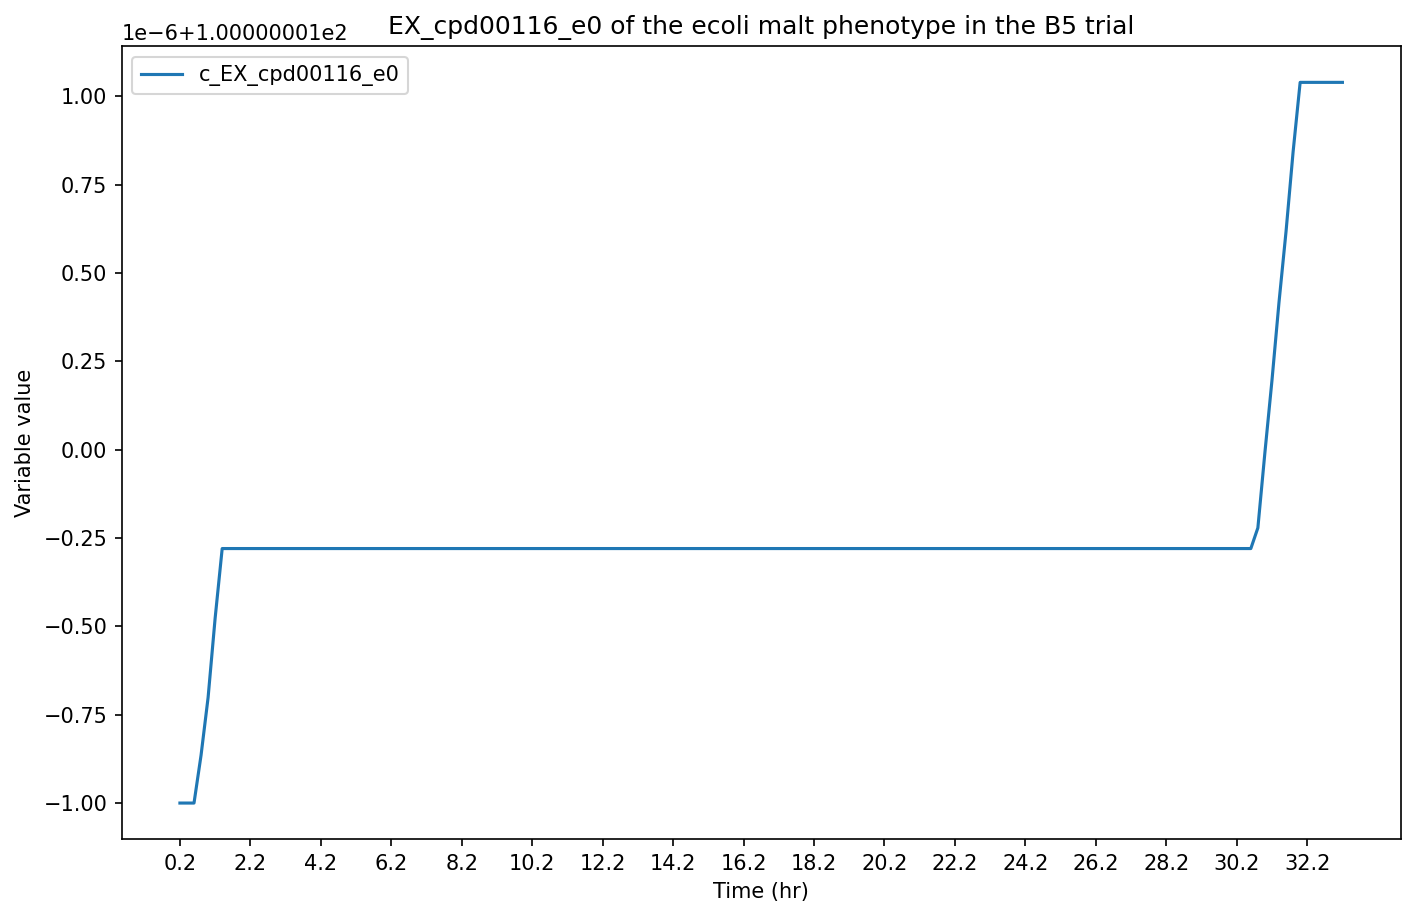

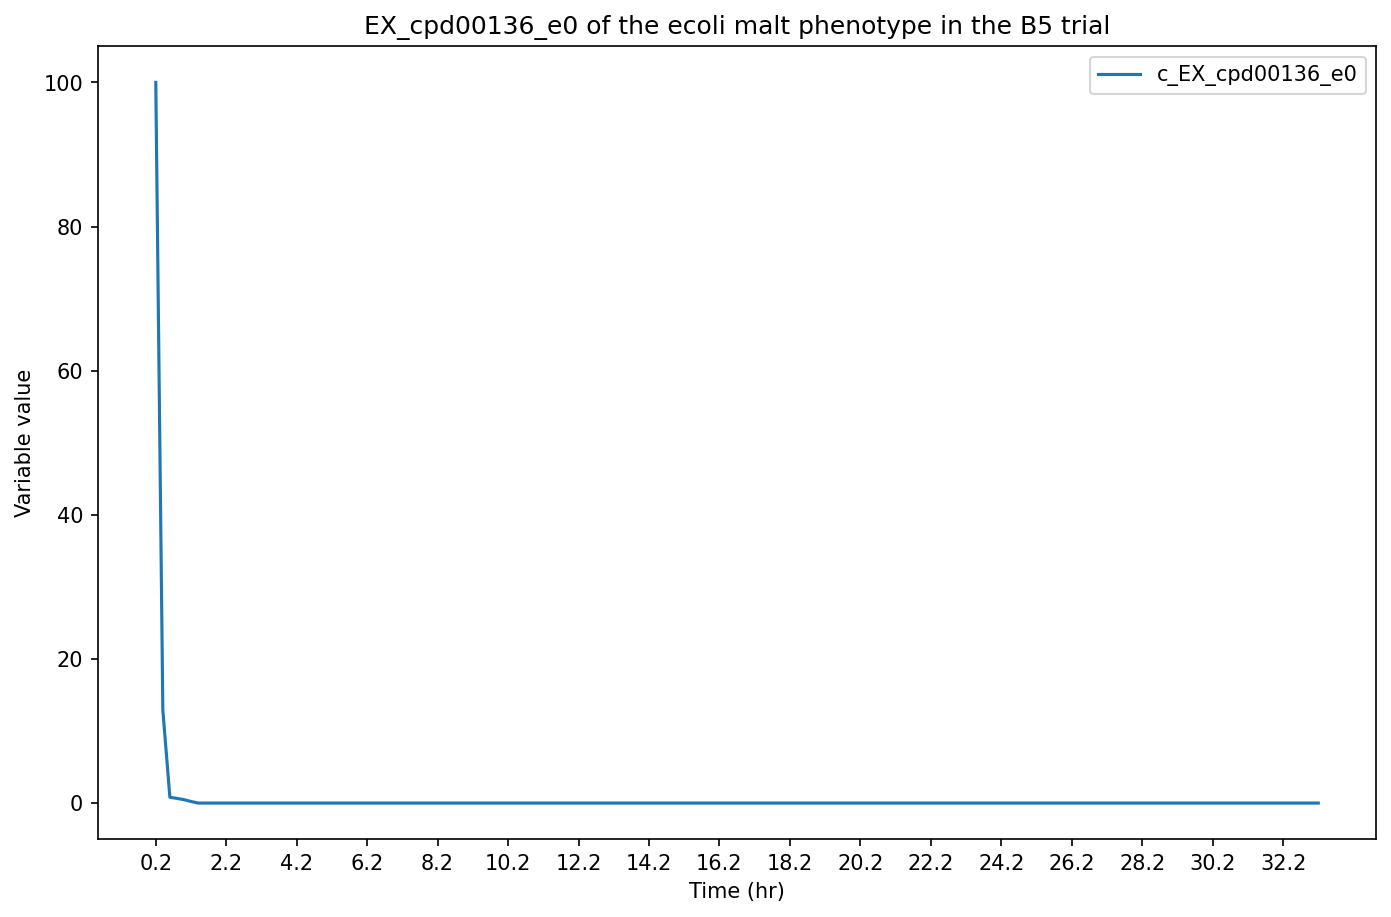

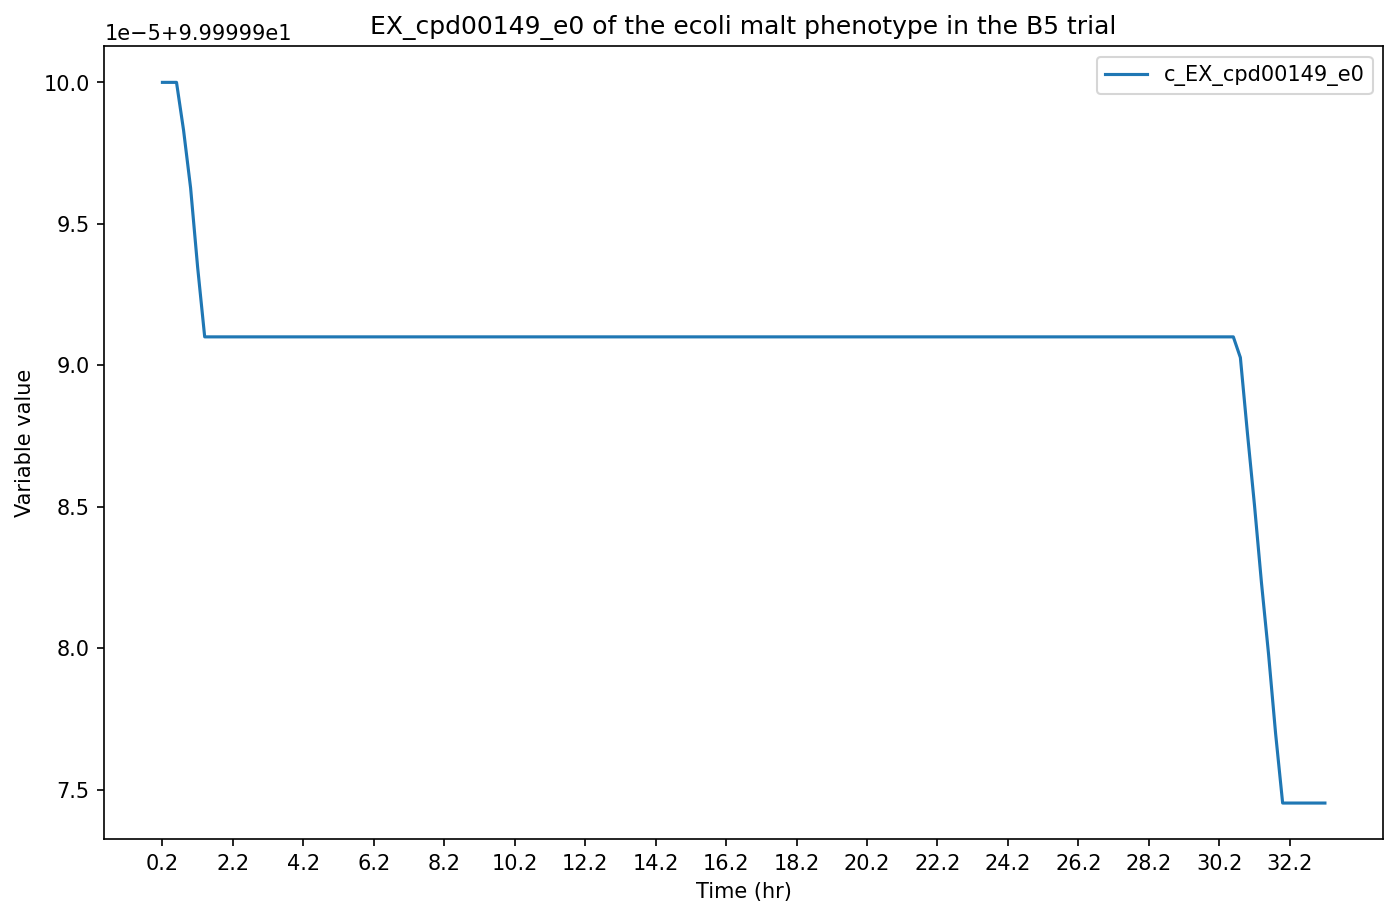

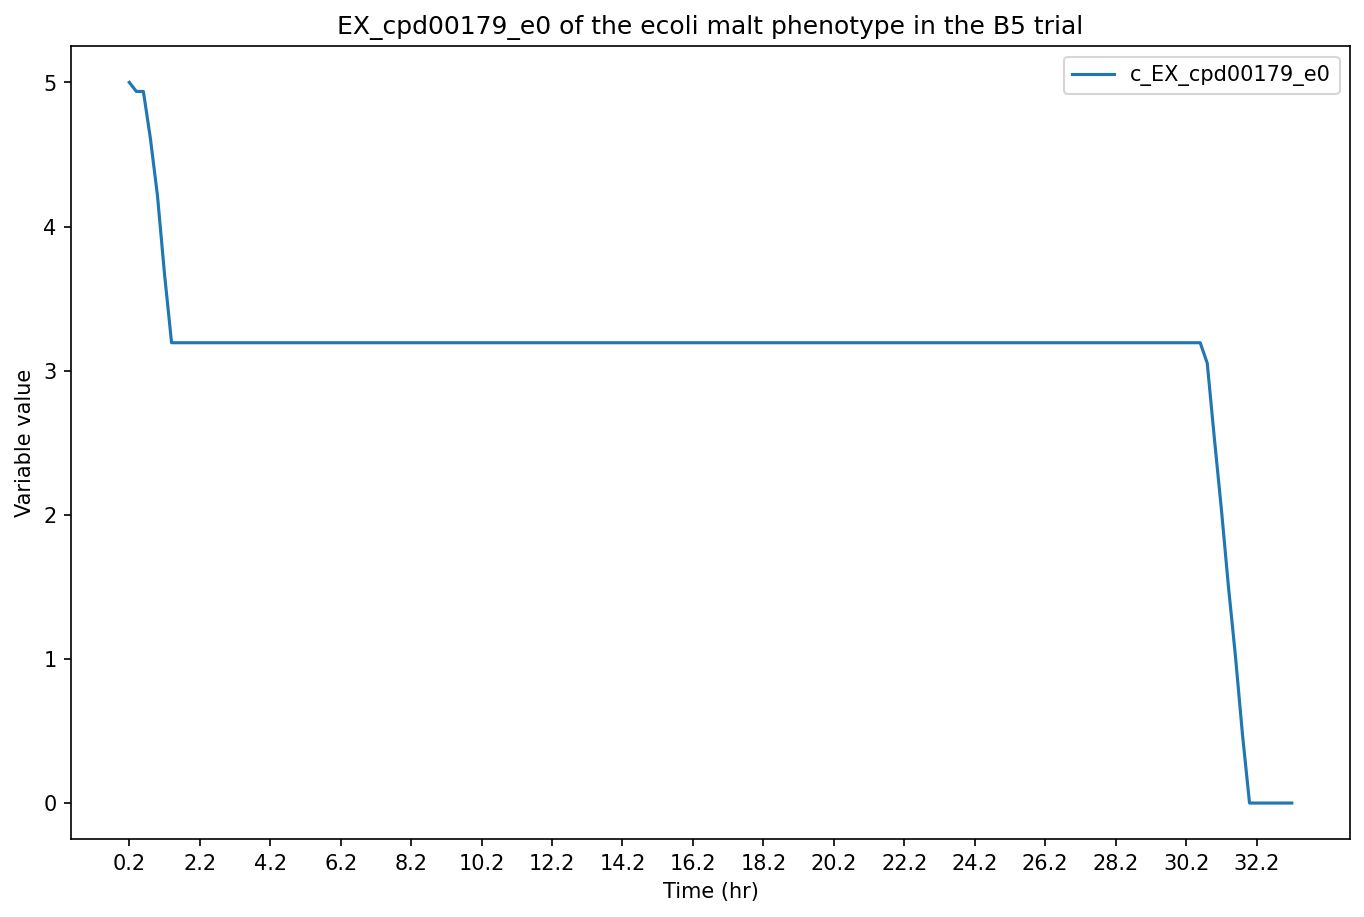

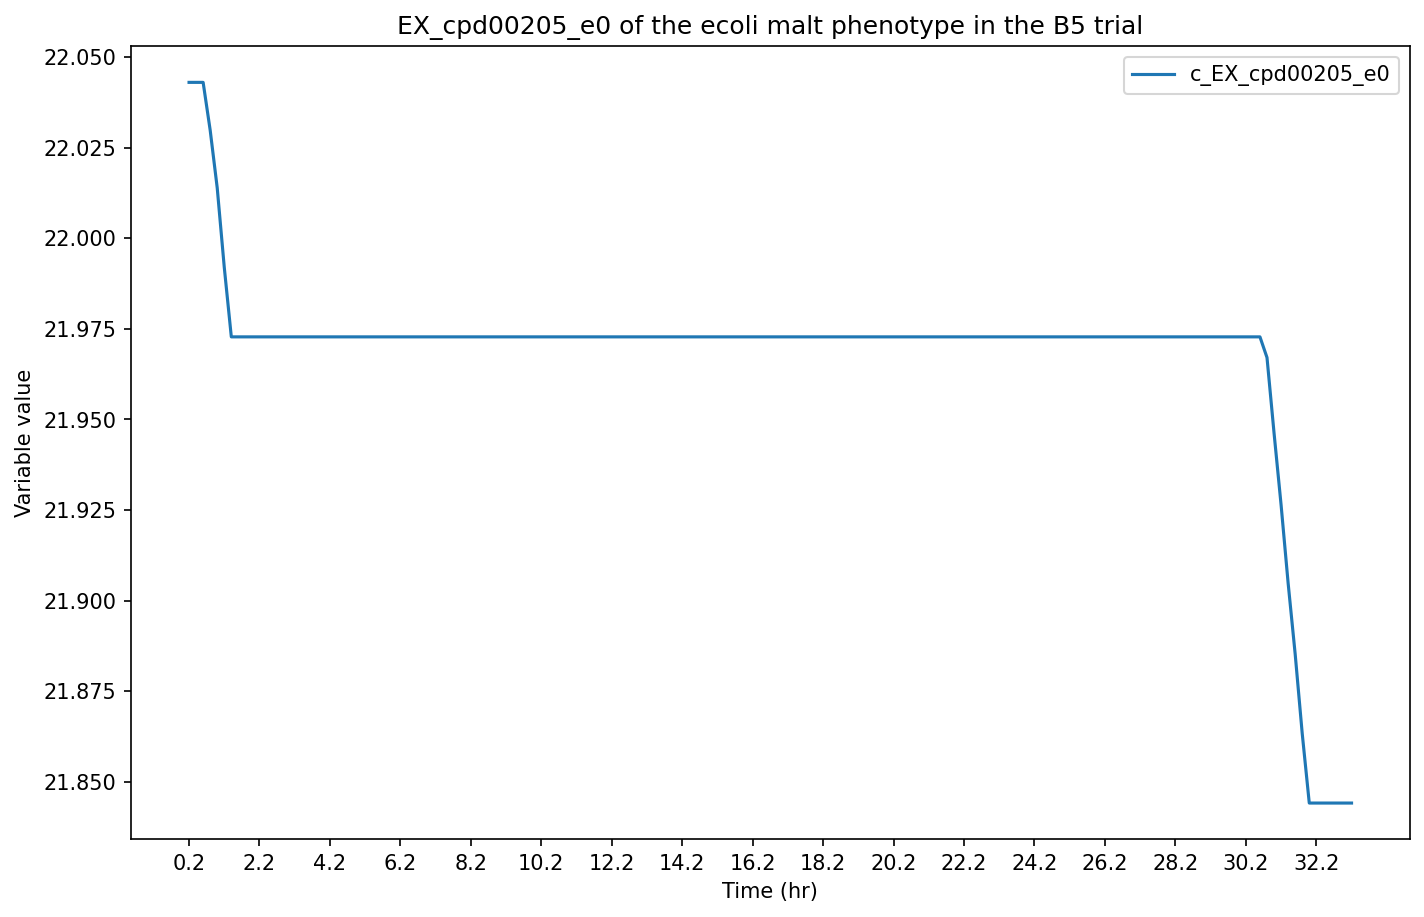

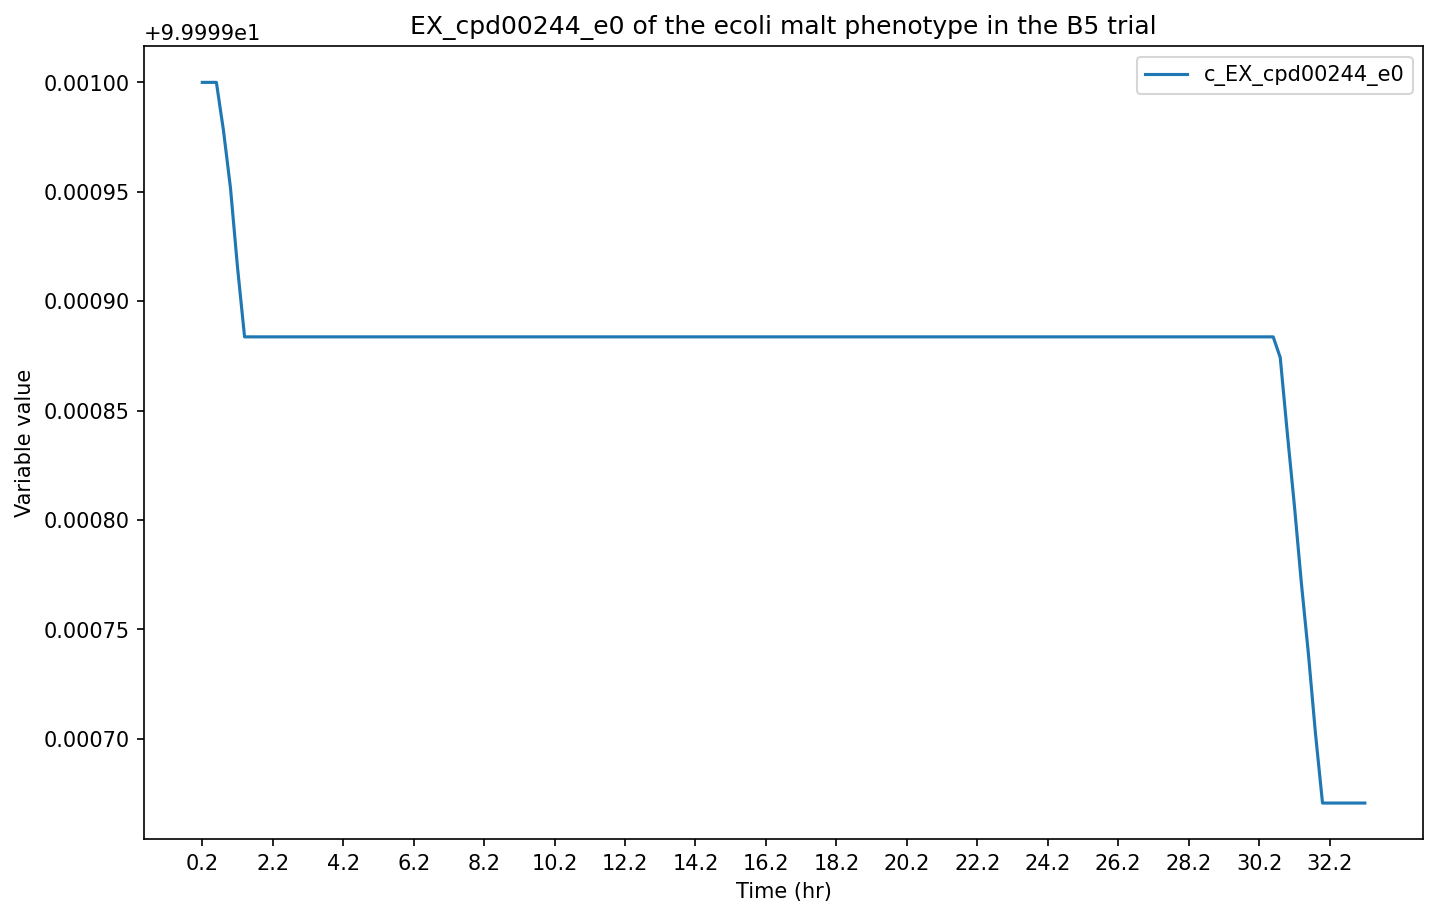

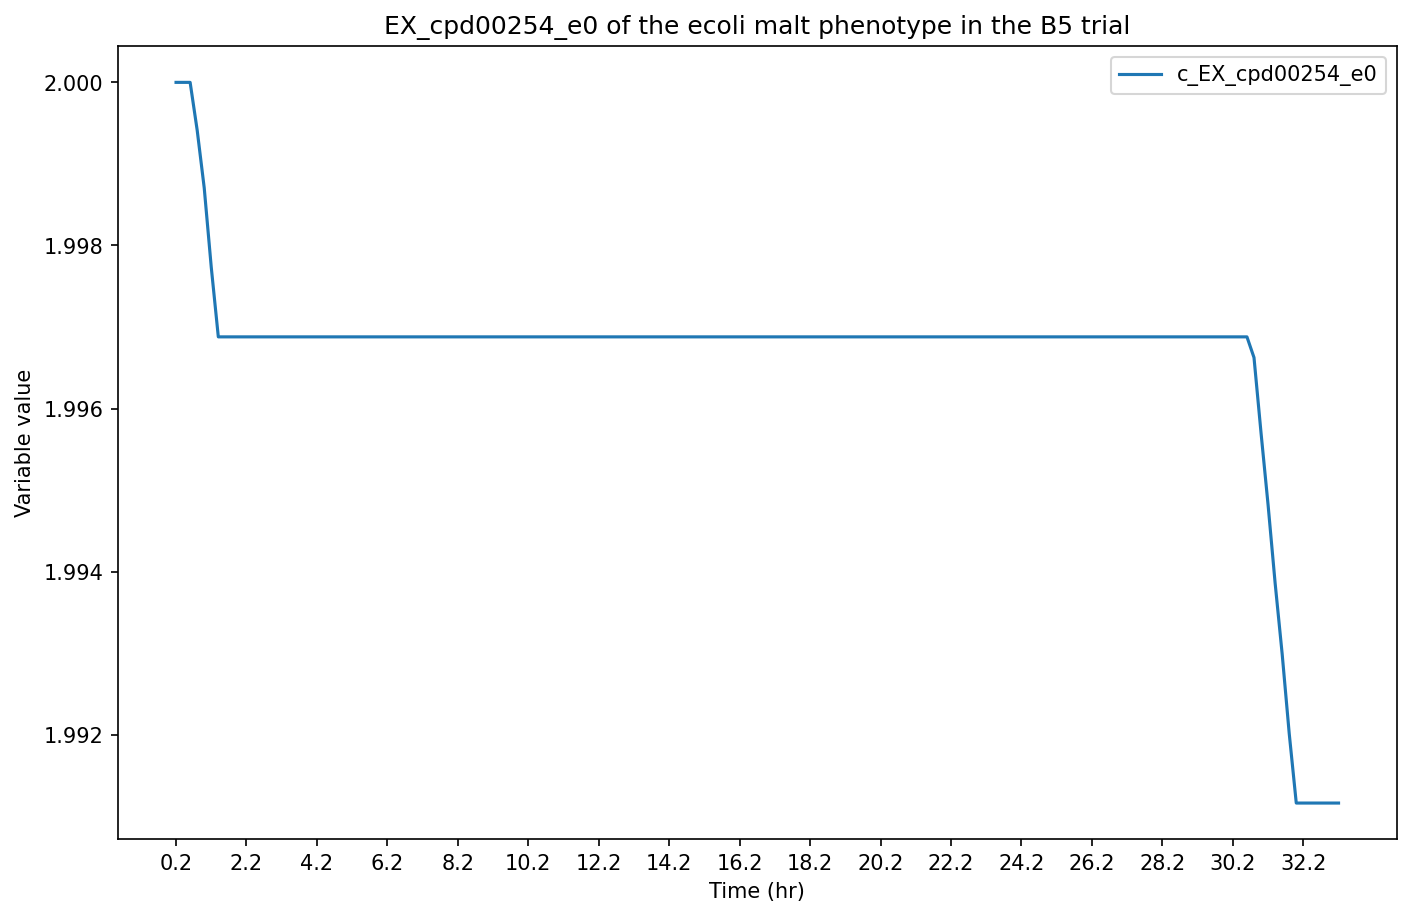

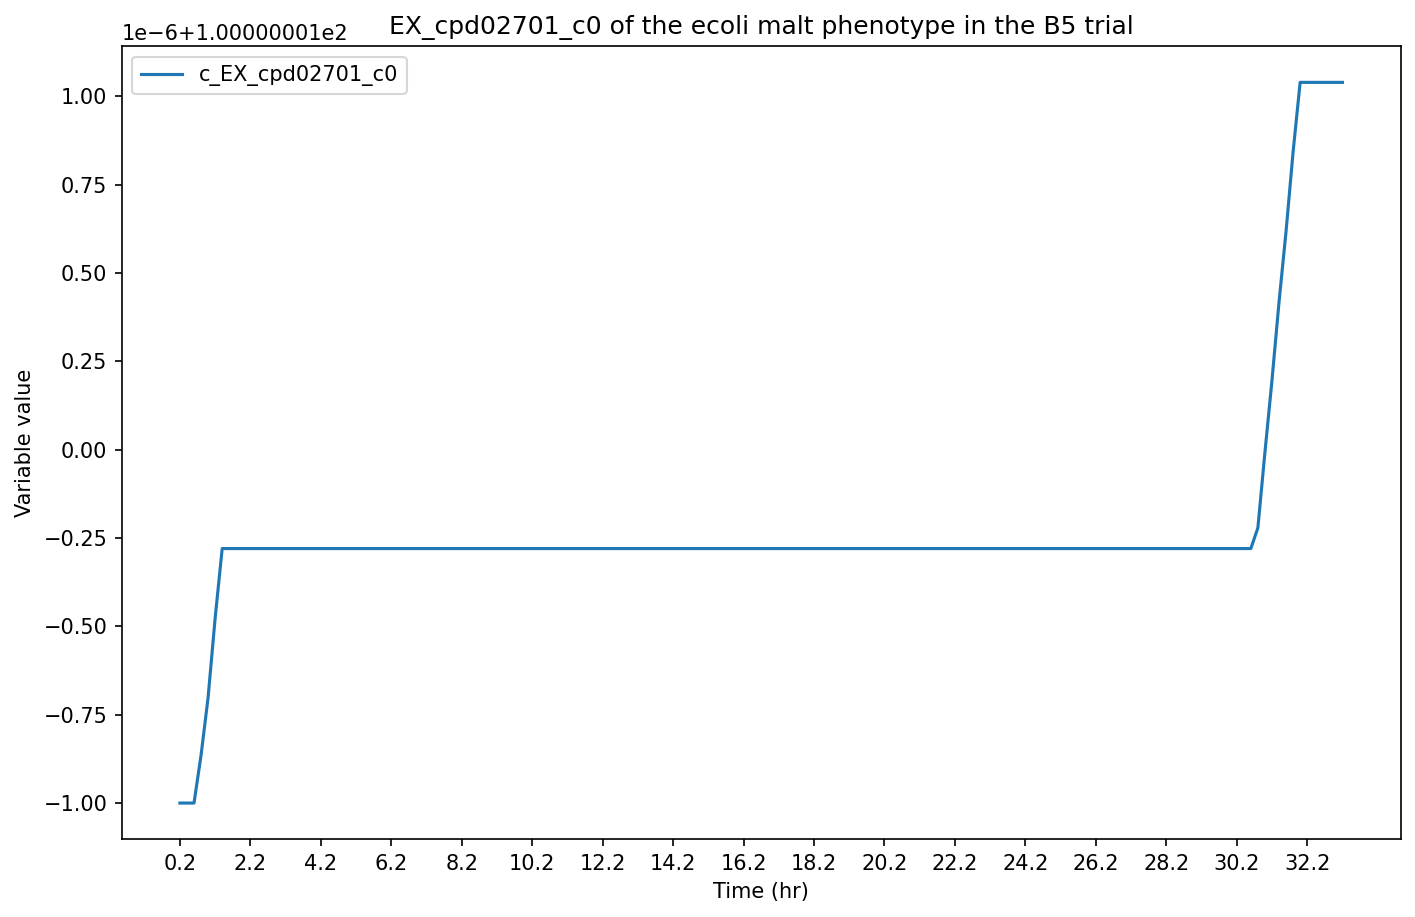

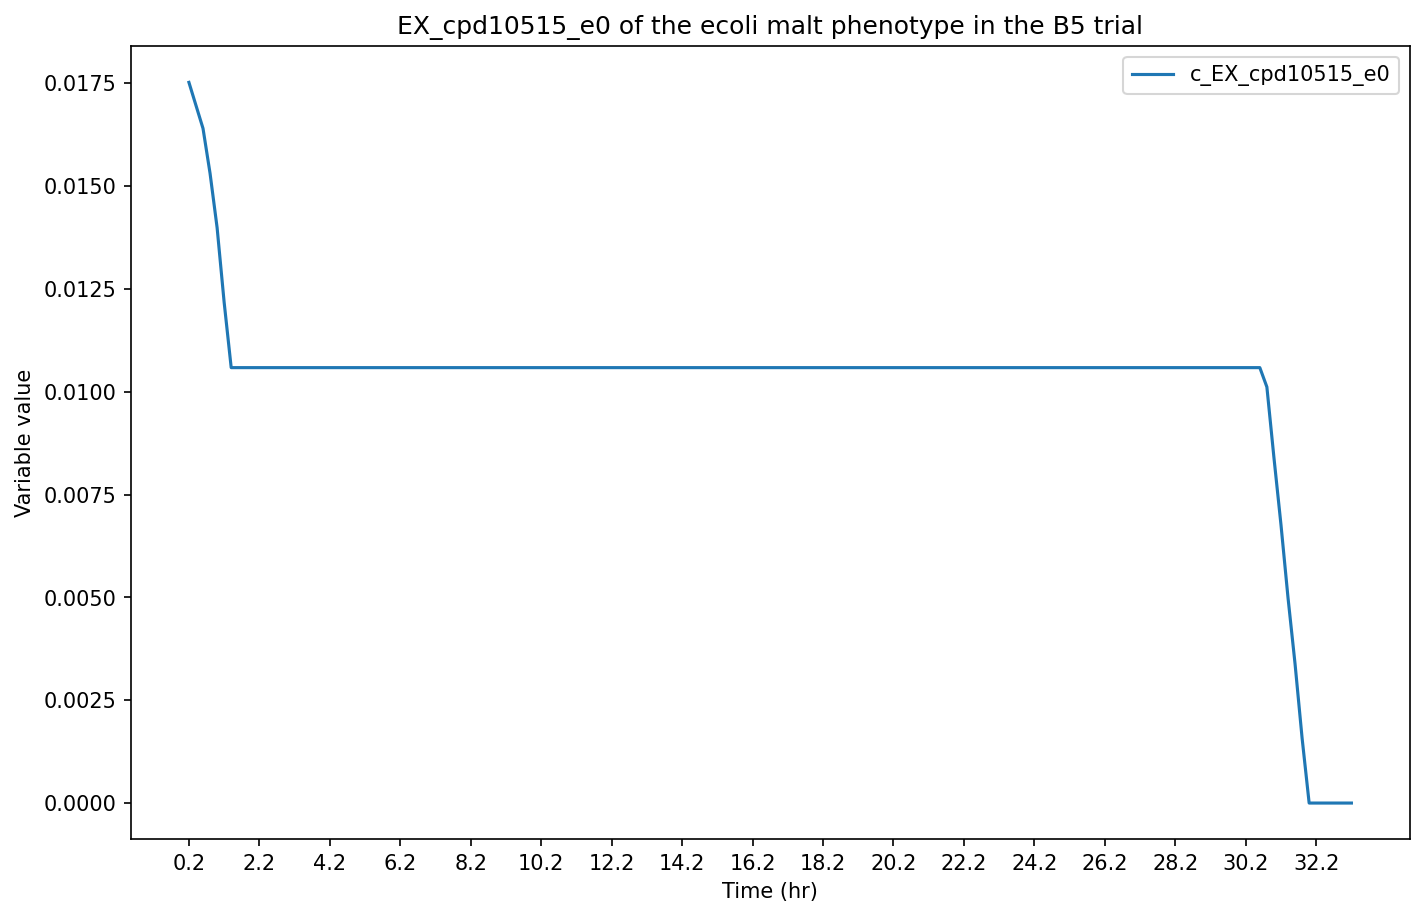

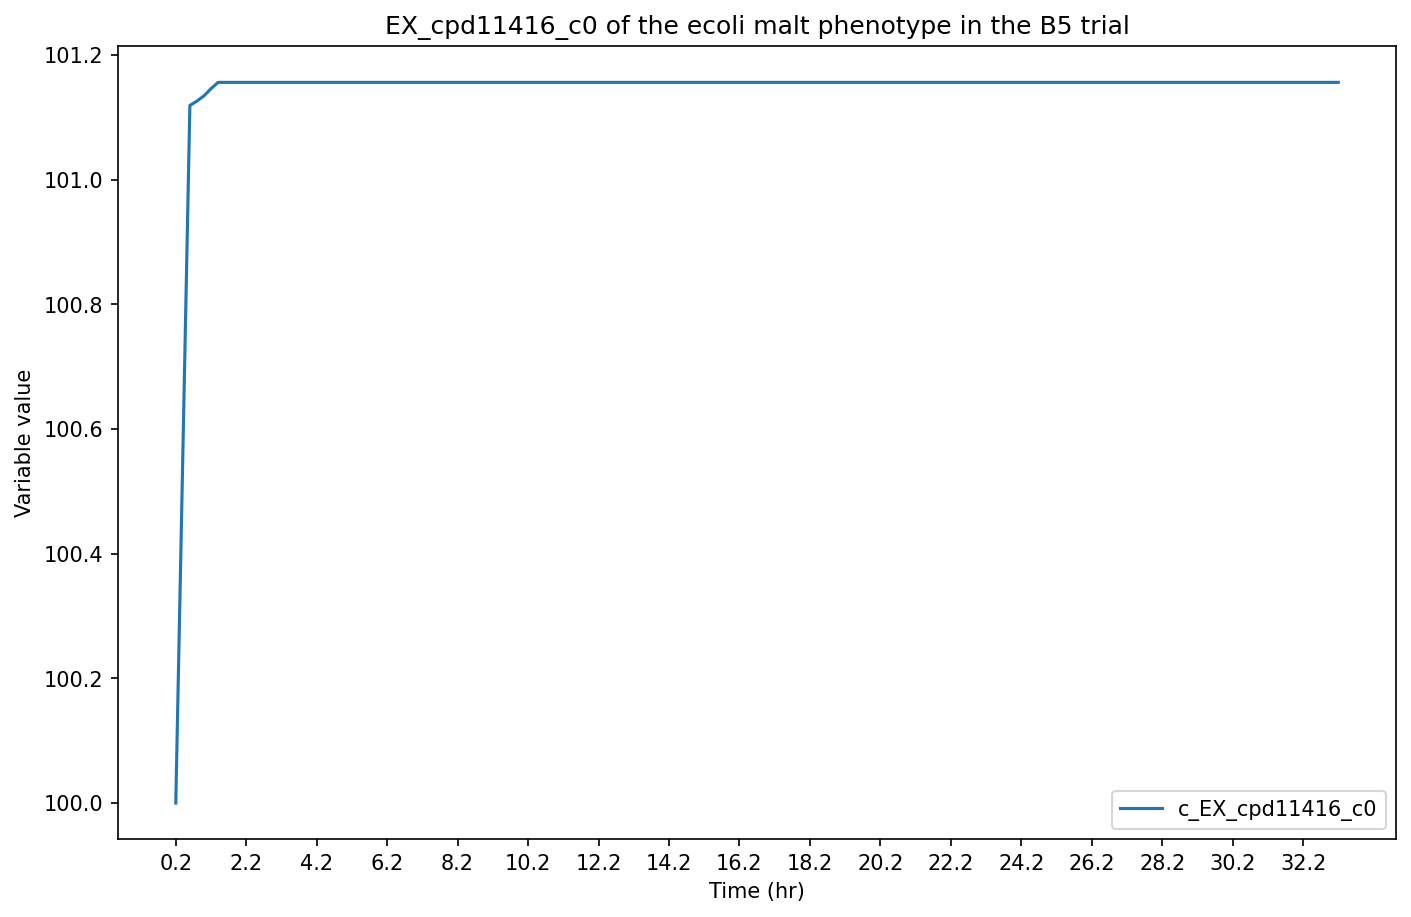

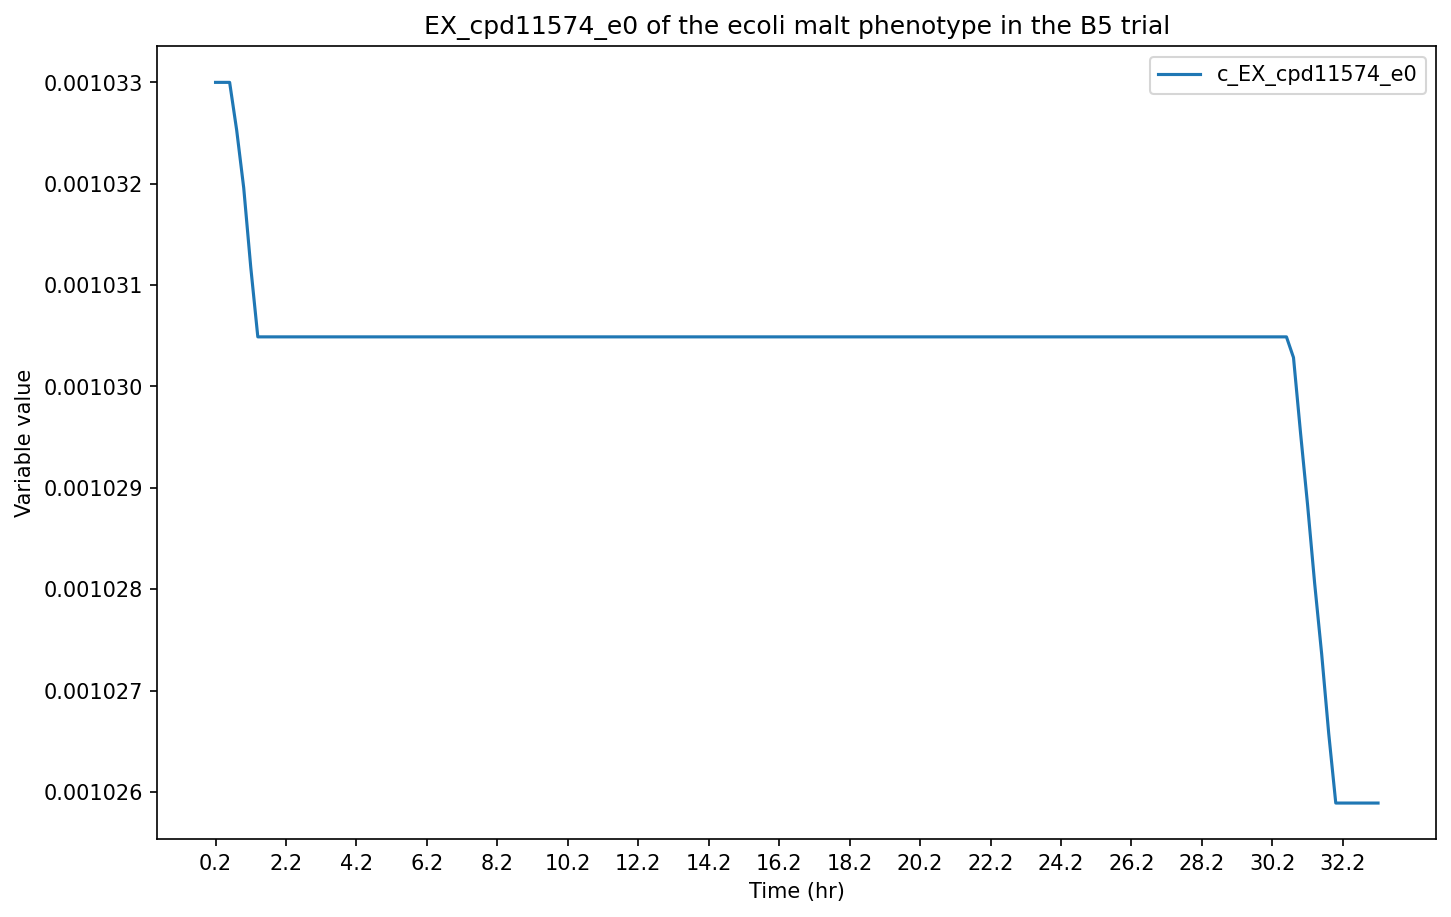

In [1]:
from datetime import datetime
from zipfile import ZipFile
from pandas import read_csv
import os
# from mscommfitting import MSCommFitting
# os.chdir('C:/Users/Andrew Freiburger/Documents/Argonne/ProjectNotebooks/CommunityModeling/CommFitting/Ecoli_maltose')
%run mscommfitting.py
with ZipFile('msComFit.zip', 'r') as zp:
    zp.extractall()
fluxes_df = read_csv('PhenotypeStoichiometry.csv')
graphs = []
for metabolite in fluxes_df['rxn'].to_list():
    graphs.append({
        'trial':'B5',
        'content': metabolite,
        'species': 'ecoli',
        'phenotype': 'malt'
    })
mscommfit2 = MSCommFitting(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           unzip_contents=True)
print(datetime.today())
mscommfit2.define_problem(parameters={
    'v':100,
    'cvmin': 0.5,
    'bcv': 0.5
    }, zip_contents=True)
print(datetime.today())
%time mscommfit2.compute(graphs)
print('growth:', mscommfit2.parameters['v'], 'objective value:', mscommfit2.problem.objective.value, '\n\n\n\n')